In [2]:
pip install -r requirements.txt

  Using cached torchvision-0.23.0-cp39-cp39-win_amd64.whl (1.6 MB)
  Using cached nibabel-5.3.2-py3-none-any.whl (3.3 MB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)
  Using cached albumentations-2.0.8-py3-none-any.whl (369 kB)
  Using cached segmentation_models_pytorch-0.5.0-py3-none-any.whl (154 kB)
  Using cached wandb-0.22.2-py3-none-win_amd64.whl (19.1 MB)
  Using cached tensorboard-2.20.0-py3-none-any.whl (5.5 MB)
  Using cached xgboost-2.1.4-py3-none-win_amd64.whl (124.9 MB)
  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)
  Using cached grad_cam-1.5.5-py3-none-any.whl
  Using cached lime-0.2.0.1-py3-none-any.whl
  Using cached shap-0.48.0-cp39-cp39-win_amd64.whl (544 kB)
  Using cached numpy-1.24.4-cp39-cp39-win_amd64.whl (14.9 MB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
  Using cached eval_type_backport-0.2.2-py3-none-any.whl (5.8 kB)
  U

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\~~mpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



In [1]:
pip install numpy==1.26.4

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyradiomics

  Using cached pyradiomics-3.1.0.tar.gz (34.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz (from https://pypi.org/simple/pyradiomics/): Requested pyradiomics from https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz has inconsistent version: expected '3.1.0', but metadata has '3.0.1a1'
  Using cached pyradiomics-3.0.1.tar.gz (34.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      Traceback (most recent call last):
        File "/Users/sreethanubhuvaneshgk/Downloads/desktop/home_f

In [3]:
pip install monai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 7.3 MB/s  0:00:00 eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# 02_preprocessing_pipeline.ipynb
# Test and validate preprocessing pipeline

## CELL 1: Setup and Imports

In [6]:
import os
import sys
import yaml
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
import torch
from pathlib import Path

# Add src to path
sys.path.append(r'/Users/sreethanubhuvaneshgk/Downloads/desktop/home_folder/lung-cancer-detection/src')

from preprocessing import CTPreprocessor, Augmentation3D, create_preprocessor, create_augmentation
from utils import visualize_volume_slices

print("✓ Imports successful")

# Load config
with open(r'/Users/sreethanubhuvaneshgk/Downloads/desktop/home_folder/lung-cancer-detection/configs/config.yaml', 'r') as f:
    config = yaml.safe_load(f)

print("✓ Configuration loaded")

✓ Imports successful
✓ Configuration loaded


## Initialize Preprocessor

In [11]:
sys.path.append("/Users/sreethanubhuvaneshgk/Downloads/desktop/home_folder/lung-cancer-detection/src")

from preprocessing import create_preprocessor, create_augmentation


print("\n" + "="*60)
print("PREPROCESSING PIPELINE INITIALIZATION")
print("="*60)

# 1️⃣ Load YAML config
with open("/Users/sreethanubhuvaneshgk/Downloads/desktop/home_folder/lung-cancer-detection/configs/config.yaml", "r") as f:
    config = yaml.safe_load(f)

# 2️⃣ Create preprocessor
preprocessor = create_preprocessor(config)

print("\nPreprocessor settings:")
print(f"  HU range: [{config['preprocessing']['hu_min']}, {config['preprocessing']['hu_max']}]")
print(f"  Target spacing: {config['preprocessing']['target_spacing']}")
print(f"  Lung threshold: {config['preprocessing']['lung_segmentation_threshold']}")

# 3️⃣ Create augmentation
augmentation = create_augmentation()

print("\nAugmentation settings:")
print(f"  Rotation range: ±{config['augmentation']['rotation_range']}°")
print(f"  Zoom range: {config['augmentation']['zoom_range']}")
print(f"  Flip probability: {config['augmentation']['flip_probability']}")
print(f"  Noise std: {config['augmentation']['noise_std']}")


PREPROCESSING PIPELINE INITIALIZATION

Preprocessor settings:
  HU range: [-1000, 400]
  Target spacing: [1.0, 1.0, 1.0]
  Lung threshold: -320

Augmentation settings:
  Rotation range: ±15°
  Zoom range: [0.9, 1.1]
  Flip probability: 0.5
  Noise std: 0.01


## Load Sample CT Scan

In [21]:
print("\n" + "="*60)
print("LOADING SAMPLE CT SCAN")
print("="*60)

import pandas as pd
from pathlib import Path
import SimpleITK as sitk
import numpy as np


# Load annotations
annotations = pd.read_csv('/Users/sreethanubhuvaneshgk/Downloads/desktop/home_folder/lung-cancer-detection/data/annotations/annotations.csv')
sample_uid = annotations['seriesuid'].iloc[0]

print(f"\nSample patient: {sample_uid}")

# Define data directory
data_dir = Path("/Users/sreethanubhuvaneshgk/Downloads/desktop/home_folder/lung-cancer-detection/data/raw")
mhd_file = None

# Search through subset folders
for subset_dir in data_dir.glob("subset*"):
    potential_file = subset_dir / f"{sample_uid}.mhd"
    if potential_file.exists():
        mhd_file = potential_file
        break

if mhd_file and mhd_file.exists():
    # Load CT image
    itk_image = sitk.ReadImage(str(mhd_file))
    original_image = sitk.GetArrayFromImage(itk_image)
    spacing = np.array(itk_image.GetSpacing())
    origin = np.array(itk_image.GetOrigin())
    
    print(f"✓ Loaded CT scan")
    print(f"  Original shape: {original_image.shape}")
    print(f"  Spacing: {spacing}")
    print(f"  HU range: [{original_image.min()}, {original_image.max()}]")
    print(f"  Data type: {original_image.dtype}")
else:
    print("⚠ Sample file not found. Creating synthetic data for testing...")
    original_image = np.random.randn(100, 256, 256) * 400 - 600
    spacing = np.array([1.0, 1.0, 1.0])
    origin = np.array([0.0, 0.0, 0.0])



LOADING SAMPLE CT SCAN

Sample patient: 1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
⚠ Sample file not found. Creating synthetic data for testing...


## Visualize Original CT Scan


ORIGINAL CT SCAN VISUALIZATION


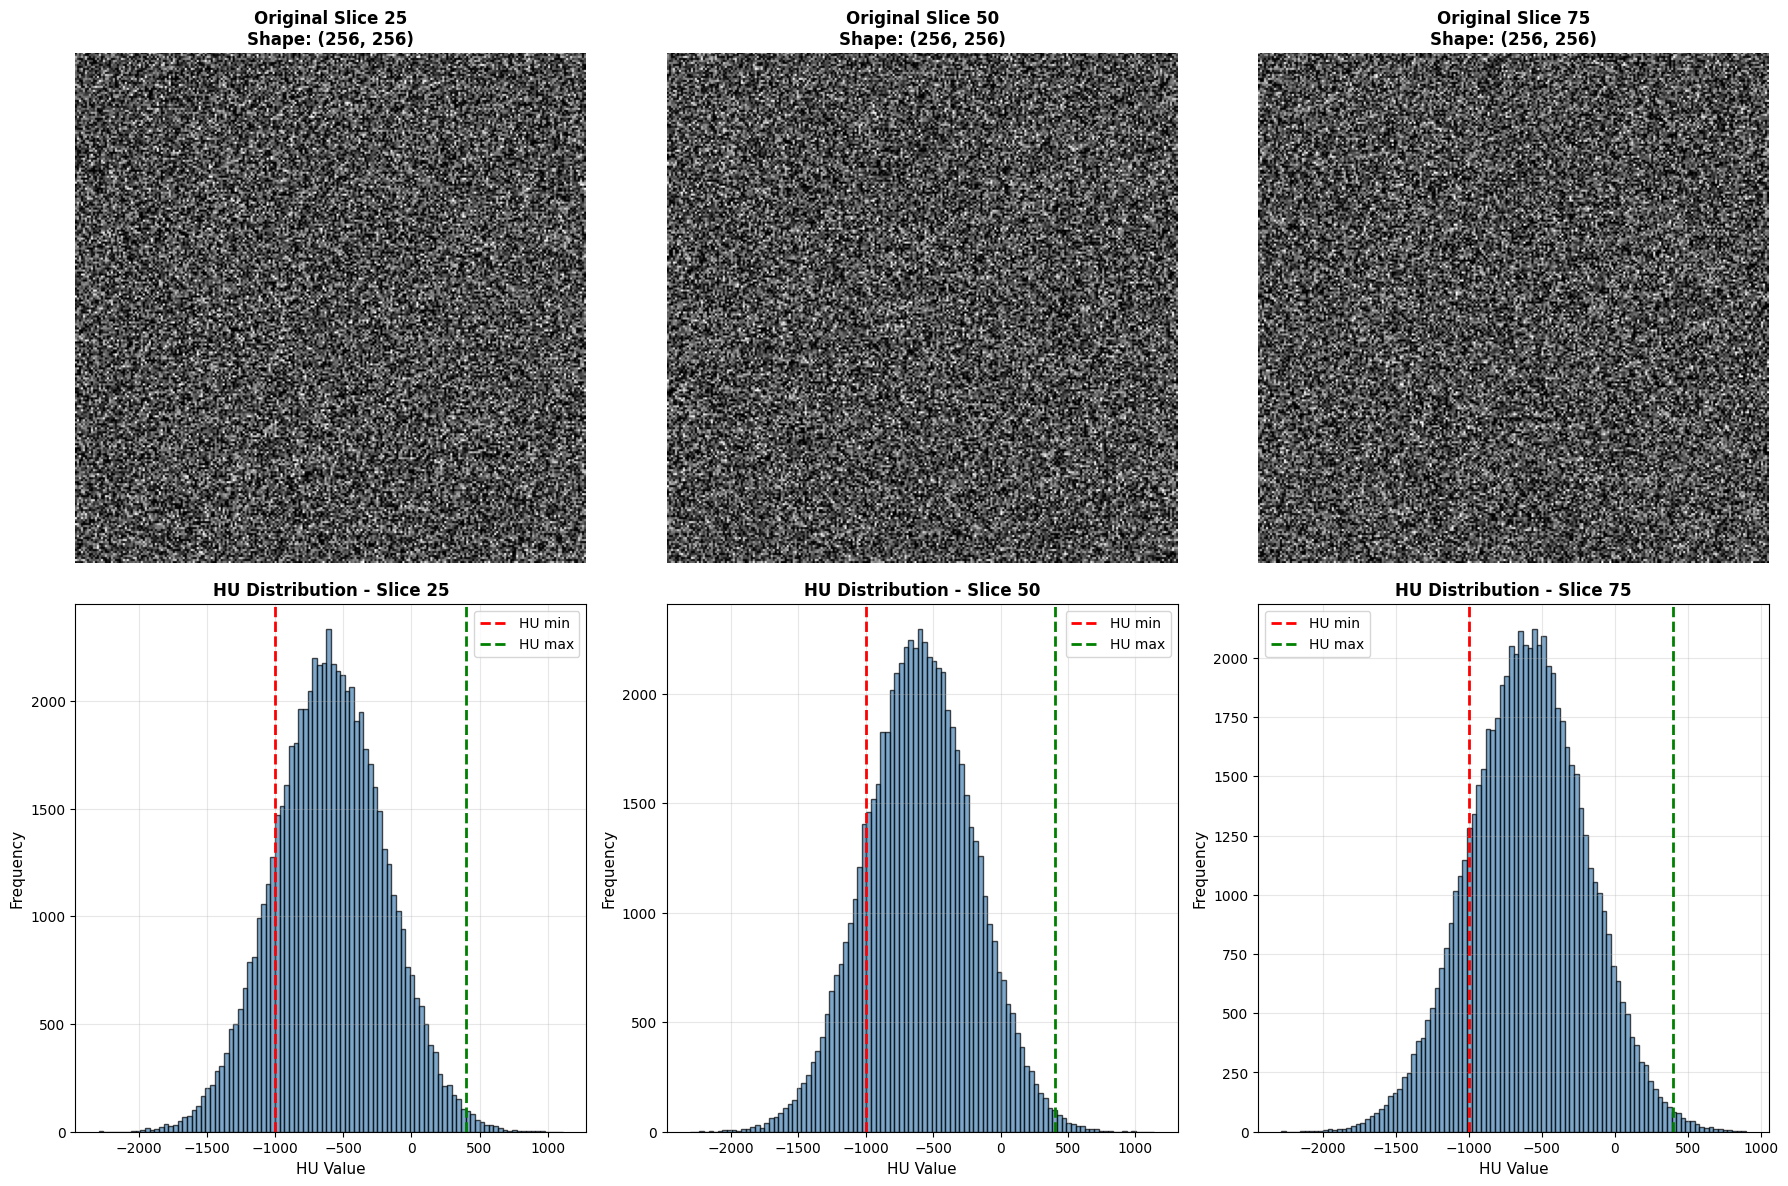


✓ Visualized 3 slices


In [22]:
print("\n" + "="*60)
print("ORIGINAL CT SCAN VISUALIZATION")
print("="*60)

depth = original_image.shape[0]
slice_indices = [depth//4, depth//2, 3*depth//4]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for idx, slice_idx in enumerate(slice_indices):
    # CT slice
    axes[0, idx].imshow(original_image[slice_idx], cmap='gray', vmin=-1000, vmax=400)
    axes[0, idx].set_title(f'Original Slice {slice_idx}\nShape: {original_image[slice_idx].shape}', 
                          fontsize=12, fontweight='bold')
    axes[0, idx].axis('off')
    
    # HU histogram
    axes[1, idx].hist(original_image[slice_idx].flatten(), bins=100, 
                     color='steelblue', alpha=0.7, edgecolor='black')
    axes[1, idx].set_xlabel('HU Value', fontsize=11)
    axes[1, idx].set_ylabel('Frequency', fontsize=11)
    axes[1, idx].set_title(f'HU Distribution - Slice {slice_idx}', fontsize=12, fontweight='bold')
    axes[1, idx].axvline(config['preprocessing']['hu_min'], color='red', 
                        linestyle='--', label='HU min', linewidth=2)
    axes[1, idx].axvline(config['preprocessing']['hu_max'], color='green', 
                        linestyle='--', label='HU max', linewidth=2)
    axes[1, idx].legend()
    axes[1, idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/original_ct_scan.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✓ Visualized {len(slice_indices)} slices")

## Step 1 - HU Normalization

In [23]:
print("\n" + "="*60)
print("STEP 1: HU NORMALIZATION")
print("="*60)

# Normalize
normalized = preprocessor.normalize_hu(original_image.copy())

print(f"\nNormalization results:")
print(f"  Input range: [{original_image.min():.2f}, {original_image.max():.2f}]")
print(f"  Output range: [{normalized.min():.4f}, {normalized.max():.4f}]")
print(f"  Target range: [0, 1]")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

mid_slice = depth // 2

# Original
im1 = axes[0].imshow(original_image[mid_slice], cmap='gray', vmin=-1000, vmax=400)
axes[0].set_title('Original CT (HU)', fontsize=14, fontweight='bold')
axes[0].axis('off')
plt.colorbar(im1, ax=axes[0], fraction=0.046)

# Normalized
im2 = axes[1].imshow(normalized[mid_slice], cmap='gray', vmin=0, vmax=1)
axes[1].set_title('Normalized [0, 1]', fontsize=14, fontweight='bold')
axes[1].axis('off')
plt.colorbar(im2, ax=axes[1], fraction=0.046)

# Comparison histogram
axes[2].hist(original_image[mid_slice].flatten(), bins=50, alpha=0.5, 
            label='Original', color='blue', edgecolor='black')
axes[2].hist(normalized[mid_slice].flatten() * 400 - 1000, bins=50, alpha=0.5, 
            label='Normalized (rescaled)', color='red', edgecolor='black')
axes[2].set_xlabel('HU Value', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].set_title('Distribution Comparison', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/hu_normalization.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ HU normalization complete")


STEP 1: HU NORMALIZATION


AttributeError: 'CTPreprocessor' object has no attribute 'normalize_hu'

## Step 2 - Lung Segmentation

In [ ]:
print("\n" + "="*60)
print("STEP 2: LUNG SEGMENTATION")
print("="*60)

# Segment lungs
lung_mask = preprocessor.segment_lungs(normalized)

print(f"\nSegmentation results:")
print(f"  Mask shape: {lung_mask.shape}")
print(f"  Lung volume: {lung_mask.sum()} voxels")
print(f"  Lung percentage: {lung_mask.sum() / lung_mask.size * 100:.2f}%")

# Visualize
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for idx, slice_idx in enumerate(slice_indices):
    # Original with mask overlay
    axes[0, idx].imshow(normalized[slice_idx], cmap='gray')
    axes[0, idx].imshow(lung_mask[slice_idx], cmap='Reds', alpha=0.3)
    axes[0, idx].set_title(f'Lung Mask Overlay - Slice {slice_idx}', 
                          fontsize=12, fontweight='bold')
    axes[0, idx].axis('off')
    
    # Masked lung region
    masked = normalized[slice_idx] * lung_mask[slice_idx]
    axes[1, idx].imshow(masked, cmap='gray')
    axes[1, idx].set_title(f'Extracted Lung - Slice {slice_idx}', 
                          fontsize=12, fontweight='bold')
    axes[1, idx].axis('off')

plt.tight_layout()
plt.savefig('../results/lung_segmentation.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Lung segmentation complete")

## Step 3 - Cropping to Lung Region

In [ ]:
print("\n" + "="*60)
print("STEP 3: CROP TO LUNG REGION")
print("="*60)

# Crop
cropped, bbox = preprocessor.crop_to_lungs(normalized, lung_mask, margin=10)

print(f"\nCropping results:")
print(f"  Original shape: {normalized.shape}")
print(f"  Cropped shape: {cropped.shape}")
if bbox:
    print(f"  Bounding box: {bbox}")
    z_min, z_max, y_min, y_max, x_min, x_max = bbox
    print(f"  Size reduction: {normalized.size} → {cropped.size} ({cropped.size/normalized.size*100:.1f}%)")

# Visualize
if cropped is not None and bbox is not None:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    crop_depth = cropped.shape[0]
    crop_slices = [crop_depth//4, crop_depth//2, 3*crop_depth//4]
    
    for idx, slice_idx in enumerate(crop_slices):
        axes[idx].imshow(cropped[slice_idx], cmap='gray')
        axes[idx].set_title(f'Cropped Slice {slice_idx}', fontsize=12, fontweight='bold')
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.savefig('../results/cropped_lungs.png', dpi=150, bbox_inches='tight')
    plt.show()

print("\n✓ Cropping complete")

## Complete Preprocessing Pipeline

In [ ]:
print("\n" + "="*60)
print("COMPLETE PREPROCESSING PIPELINE")
print("="*60)

# Run full pipeline
processed, metadata = preprocessor.preprocess(original_image, spacing)

print(f"\nPipeline results:")
print(f"  Input shape: {original_image.shape}")
print(f"  Output shape: {processed.shape}")
print(f"  Output range: [{processed.min():.4f}, {processed.max():.4f}]")
print(f"\nMetadata:")
for key, value in metadata.items():
    if key != 'lung_mask':
        print(f"  {key}: {value}")

# Visualize comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Original slices
for idx, slice_idx in enumerate(slice_indices):
    axes[0, idx].imshow(original_image[slice_idx], cmap='gray', vmin=-1000, vmax=400)
    axes[0, idx].set_title(f'Original - Slice {slice_idx}', fontsize=12, fontweight='bold')
    axes[0, idx].axis('off')

# Processed slices
proc_depth = processed.shape[0]
proc_slices = [proc_depth//4, proc_depth//2, 3*proc_depth//4]

for idx, slice_idx in enumerate(proc_slices):
    axes[1, idx].imshow(processed[slice_idx], cmap='gray')
    axes[1, idx].set_title(f'Processed - Slice {slice_idx}', fontsize=12, fontweight='bold')
    axes[1, idx].axis('off')

plt.suptitle('Before and After Preprocessing', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../results/preprocessing_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Complete pipeline executed successfully")

## Test Data Augmentation

In [24]:
print("\n" + "="*60)
print("DATA AUGMENTATION TESTING")
print("="*60)

# Extract ROI for augmentation testing
roi_size = tuple(config['preprocessing']['roi_size'])
print(f"\nROI size: {roi_size}")

# Create a sample ROI
center_z, center_y, center_x = processed.shape[0]//2, processed.shape[1]//2, processed.shape[2]//2
half_d, half_h, half_w = roi_size[0]//2, roi_size[1]//2, roi_size[2]//2

roi = processed[
    max(0, center_z-half_d):min(processed.shape[0], center_z+half_d),
    max(0, center_y-half_h):min(processed.shape[1], center_y+half_h),
    max(0, center_x-half_w):min(processed.shape[2], center_x+half_w)
]

# Pad if necessary
if roi.shape != roi_size:
    padded = np.zeros(roi_size, dtype=roi.dtype)
    padded[:roi.shape[0], :roi.shape[1], :roi.shape[2]] = roi
    roi = padded

print(f"Extracted ROI shape: {roi.shape}")

# Convert to tensor
roi_tensor = torch.from_numpy(roi).float().unsqueeze(0)  # Add channel dim

# Apply augmentations multiple times
augmented_samples = []
for i in range(6):
    aug = augmentation(roi_tensor.clone())
    augmented_samples.append(aug)

# Visualize original and augmented
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

mid_slice = roi_size[0] // 2

# Original (top-left)
axes[0, 0].imshow(roi_tensor[0, mid_slice].numpy(), cmap='gray')
axes[0, 0].set_title('Original ROI', fontsize=12, fontweight='bold', color='red')
axes[0, 0].axis('off')

# Augmented samples
positions = [(0,1), (0,2), (1,0), (1,1), (1,2), (2,0)]
for idx, (aug_sample, pos) in enumerate(zip(augmented_samples, positions)):
    axes[pos[0], pos[1]].imshow(aug_sample[0, mid_slice].numpy(), cmap='gray')
    axes[pos[0], pos[1]].set_title(f'Augmented {idx+1}', fontsize=12, fontweight='bold')
    axes[pos[0], pos[1]].axis('off')

# Hide extra subplots
axes[2, 1].axis('off')
axes[2, 2].axis('off')

plt.suptitle('Data Augmentation Examples', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('../results/augmentation_examples.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Augmentation testing complete")


DATA AUGMENTATION TESTING

ROI size: (64, 64, 64)


NameError: name 'processed' is not defined

## Augmentation Component Analysis

In [ ]:
print("\n" + "="*60)
print("INDIVIDUAL AUGMENTATION COMPONENTS")
print("="*60)

# Test individual augmentation types
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

mid_slice = roi_size[0] // 2

# Original
axes[0, 0].imshow(roi_tensor[0, mid_slice].numpy(), cmap='gray')
axes[0, 0].set_title('Original', fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

# Rotation
rotated = augmentation.random_rotation(roi_tensor.clone())
axes[0, 1].imshow(rotated[0, mid_slice].numpy(), cmap='gray')
axes[0, 1].set_title('Rotation', fontsize=12, fontweight='bold')
axes[0, 1].axis('off')

# Flip
flipped = augmentation.random_flip(roi_tensor.clone())
axes[0, 2].imshow(flipped[0, mid_slice].numpy(), cmap='gray')
axes[0, 2].set_title('Flip', fontsize=12, fontweight='bold')
axes[0, 2].axis('off')

# Zoom
zoomed = augmentation.random_zoom(roi_tensor.clone())
axes[1, 0].imshow(zoomed[0, mid_slice].numpy(), cmap='gray')
axes[1, 0].set_title('Zoom', fontsize=12, fontweight='bold')
axes[1, 0].axis('off')

# Noise
noisy = augmentation.add_noise(roi_tensor.clone())
axes[1, 1].imshow(noisy[0, mid_slice].numpy(), cmap='gray')
axes[1, 1].set_title('Noise', fontsize=12, fontweight='bold')
axes[1, 1].axis('off')

# All combined
all_aug = augmentation(roi_tensor.clone())
axes[1, 2].imshow(all_aug[0, mid_slice].numpy(), cmap='gray')
axes[1, 2].set_title('All Combined', fontsize=12, fontweight='bold')
axes[1, 2].axis('off')

plt.suptitle('Individual Augmentation Components', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('../results/augmentation_components.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Component analysis complete")

## Batch Processing Test

In [ ]:
print("\n" + "="*60)
print("BATCH PROCESSING TEST")
print("="*60)

# Process multiple samples
num_samples = 5
print(f"\nProcessing {num_samples} samples...")

processing_times = []
import time

for i in range(num_samples):
    start_time = time.time()
    
    # Simulate different scan
    noise_scan = original_image + np.random.randn(*original_image.shape) * 10
    
    # Process
    processed_batch, _ = preprocessor.preprocess(noise_scan, spacing)
    
    elapsed = time.time() - start_time
    processing_times.append(elapsed)
    
    print(f"  Sample {i+1}: {elapsed:.2f}s - Shape: {processed_batch.shape}")

print(f"\nBatch processing statistics:")
print(f"  Mean time: {np.mean(processing_times):.2f}s")
print(f"  Std time: {np.std(processing_times):.2f}s")
print(f"  Total time: {np.sum(processing_times):.2f}s")

## Memory Usage Analysis

In [ ]:
print("\n" + "="*60)
print("MEMORY USAGE ANALYSIS")
print("="*60)

import sys

def get_size_mb(obj):
    """Get object size in MB"""
    return sys.getsizeof(obj) / (1024 * 1024)

print(f"\nMemory usage:")
print(f"  Original image: {get_size_mb(original_image):.2f} MB")
print(f"  Normalized: {get_size_mb(normalized):.2f} MB")
print(f"  Lung mask: {get_size_mb(lung_mask):.2f} MB")
print(f"  Processed: {get_size_mb(processed):.2f} MB")
print(f"  ROI tensor: {get_size_mb(roi_tensor):.2f} MB")

## Pipeline Summary and Validation

In [ ]:
print("\n" + "="*60)
print("PREPROCESSING PIPELINE SUMMARY")
print("="*60)

summary = f"""
✅ PREPROCESSING VALIDATION COMPLETE

📋 Pipeline Steps Tested:
  1. ✓ HU Normalization: {original_image.shape} → [0, 1] range
  2. ✓ Lung Segmentation: {lung_mask.sum()} lung voxels detected
  3. ✓ Cropping: {original_image.shape} → {processed.shape}
  4. ✓ Resampling: Spacing {spacing} → {config['preprocessing']['target_spacing']}

🔄 Data Augmentation:
  ✓ Rotation: ±{config['augmentation']['rotation_range']}°
  ✓ Zoom: {config['augmentation']['zoom_range']}
  ✓ Flip: {config['augmentation']['flip_probability']*100}% probability
  ✓ Noise: σ={config['augmentation']['noise_std']}

⚡ Performance:
  - Average processing time: {np.mean(processing_times):.2f}s per scan
  - Memory efficient: {get_size_mb(processed):.2f} MB per processed scan

📊 Generated Outputs:
  ✓ original_ct_scan.png
  ✓ hu_normalization.png
  ✓ lung_segmentation.png
  ✓ cropped_lungs.png
  ✓ preprocessing_comparison.png
  ✓ augmentation_examples.png
  ✓ augmentation_components.png

🎯 Ready for Model Training:
  - Input shape: {roi_size}
  - Value range: [0, 1]
  - Augmentation: Enabled
"""

print(summary)

# Save summary
with open('../results/preprocessing_summary.txt', 'w') as f:
    f.write(summary)

print("\n✅ Preprocessing pipeline validation complete!")
print("📁 All results saved to '../results/'")